# 🛠 Introduction to NLP (Natural Language Processing) in TensorFlow Exercises
1. Rebuild, compile and train `model_1`, `model_2` and `model_5` using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) instead of the Functional API.
2. Retrain the baseline model with 10% of the training data. How does perform compared to the Universal Sentence Encoder model with 10% of the training data?
3. Try fine-tuning the TF Hub Universal Sentence Encoder model by setting `training=True` when instantiating it as a Keras layer.

```
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True) # turn training on to fine-tune the TensorFlow Hub model
```
4. Retrain the best model you've got so far on the whole training set (no validation split). Then use this trained model to make predictions on the test dataset and format the predictions into the same format as the `sample_submission.csv` file from Kaggle (see the Files tab in Colab for what the `sample_submission.csv` file looks like). Once you've done this, [make a submission to the Kaggle competition](https://www.kaggle.com/c/nlp-getting-started/data), how did your model perform?
5. Make a confusion matrix with the best performing model's predictions on the validation set and the validation ground truth labels.

### 📖 Introduction to NLP (Natural Language Processing) in TensorFlow Extra-curriculum
To practice what you've learned, a good idea would be to spend an hour on 3 of the following (3-hours total, you could through them all if you want) and then write a blog post about what you've learned.

* For an overview of the different problems within NLP and how to solve them read through:
  * [A Simple Introduction to Natural Language Processing](https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32)
  * [How to solve 90% of NLP problems: a step-by-step guide](https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e)
* Go through [MIT's Recurrent Neural Networks lecture](https://youtu.be/SEnXr6v2ifU). This will be one of the greatest additions to what's happening behind the RNN model's you've been building.
* Read through the [word embeddings page on the TensorFlow website](https://www.tensorflow.org/tutorials/text/word_embeddings). Embeddings are such a large part of NLP. We've covered them throughout this notebook but extra practice would be well worth it. A good exercise would be to write out all the code in the guide in a new notebook.
* For more on RNN's in TensorFlow, read and reproduce [the TensorFlow RNN guide](https://www.tensorflow.org/guide/keras/rnn). We've covered many of the concepts in this guide, but it's worth writing the code again for yourself.
* Text data doesn't always come in a nice package like the data we've downloaded. So if you're after more on preparing different text sources for being with your TensorFlow deep learning models, it's worth checking out the following:
  * [TensorFlow text loading tutorial](https://www.tensorflow.org/tutorials/load_data/text).
  * [Reading text files with Python](https://realpython.com/read-write-files-python/) by Real Python.
* This notebook has focused on writing NLP code. For a mathematically rich overview of how NLP with Deep Learning happens, read [Stanford's Natural Language Processing with Deep Learning lecture notes Part 1](https://web.stanford.edu/class/cs224n/readings/cs224n-2019-notes01-wordvecs1.pdf).  
  * For an even deeper dive, you could even do the whole [CS224n](http://web.stanford.edu/class/cs224n/) (Natural Language Processing with Deep Learning) course.
* Great blog posts to read:
  * Andrei Karpathy's [The Unreasonable Effectiveness of RNNs](https://karpathy.github.io/2015/05/21/rnn-effectiveness/) dives into generating Shakespeare text with RNNs.
  * [Text Classification with NLP: Tf-Idf vs Word2Vec vs BERT](https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794) by Mauro Di Pietro. An overview of different techniques for turning text into numbers and then classifying it.
  * [What are word embeddings?](https://machinelearningmastery.com/what-are-word-embeddings/) by Machine Learning Mastery.
* Other topics worth looking into:
  * [Attention mechanisms](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/). These are a foundational component of the transformer architecture and also often add improvements to deep NLP models.
  * [Transformer architectures](http://jalammar.github.io/illustrated-transformer/). This model architecture has recently taken the NLP world by storm, achieving state of the art on many benchmarks. However, it does take a little more processing to get off the ground, the [HuggingFace Models (formerly HuggingFace Transformers) library](https://huggingface.co/models/) is probably your best quick start.


In [1]:
# Check GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-7aec1d74-b419-34c4-54ec-5a4678304999)


### Getting helper functions

In [2]:
!wget  https://raw.githubusercontent.com/kishan5111/Deep_Learning_Vault/main/notebooks/tensorflow_course/helper_functions.py

# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-09-16 10:17:19--  https://raw.githubusercontent.com/kishan5111/Deep_Learning_Vault/main/notebooks/tensorflow_course/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10415 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.17K  --.-KB/s    in 0s      

2023-09-16 10:17:19 (107 MB/s) - ‘helper_functions.py’ saved [10415/10415]



### Get a text dataset

The dataset we're going to be using is Kaggle's Introduction to NLP dataset (text samples of Tweets labelled as disaster or not disaster).

Original source: https://www.kaggle.com/c/nlp-getting-started

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-09-16 10:17:33--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   662KB/s    in 0.9s    

2023-09-16 10:17:35 (662 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



### Visualizing the text data

In [4]:
import pandas as pd

train_data =  pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [5]:
# View train and test data
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
# How many total samples?
len(train_data), len(test_data)

(7613, 3263)

In [8]:
# Shuffle training dataframe
train_data_shuffled = train_data.sample(frac=1, random_state=42)
train_data_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [9]:
# How many example of each class?
train_data_shuffled.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
# Visualize random training samples
import random

random_index = random.randint(0, len(train_data_shuffled) - 4) # create random indexes not higher than the total number of samples
for row in train_data_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target:{target}", "(real disaster)" if target > 0 else"(not real disaster)")
  print(f"Textr:\n{text}\n")
  print("------------------\n")

Target:0 (not real disaster)
Textr:
@lucypalladino and I don't have any classes together and I'm not sure if I'll be able to survive

------------------

Target:0 (not real disaster)
Textr:
Cyclist who collided with runner on Roanoke greenway wins $300000 civil verdict http://t.co/WgasoeNCwc via @roanoketimes

------------------

Target:0 (not real disaster)
Textr:
@JYHeffect my good you stay in NY??? ?

------------------

Target:0 (not real disaster)
Textr:
@blanksocietyx @emmerdale IM SCREAMING HES MY FAVOURITE

------------------

Target:1 (real disaster)
Textr:
Slums are a manifestation state failure to provide housing to citizens. Illegality discourse confounds structural problems. #stopevictions

------------------



### Split data to training and validation data

In [11]:

from sklearn.model_selection import train_test_split

# Use train shuffled data to split it to validation and train data
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_data_shuffled["text"].to_numpy(),
                                                                            train_data_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [12]:
# Check first 10 sentences
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [13]:
# check number of samples
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

### Converting text into numbers

When dealing with a text problem, one of the first things to do before building model is to convert text to numbers.

There are a few ways to do this, namely:
* Tokenization - direct mapping of token (a token could be a word or a character) to number
* Embedding - create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)   

### Text Vectorization(Tokenization)

In [14]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Use the defeault TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=200, #Number of words in vocabulary
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,# create a groups of n-words
                                    output_mode="int", #how to map tokens to numbers
                                    output_sequence_length=None, #how long do you want sequence to be?
                                    pad_to_max_tokens=True)

In [15]:
# Find the average number of tokens(words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/ len(train_sentences))

15

In [16]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in vocab
max_length = 15 # max length our sequences will be(e.g. how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [17]:
# Fit the text vectorizer to training text
text_vectorizer.adapt(train_sentences)

In [18]:
# Create a sample sentence and tokenize it
sample_sentence = "There is flood in my streets!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  74,    9,  232,    4,   13, 1585,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [19]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\\n\nVectorized version: ")
text_vectorizer([random_sentence])

Original text:
 A fierce windstorm can't take place without da calm/stillness of the eye/center so w/ that said ur internal aspects weigh more than external\n
Vectorized version: 


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   3, 5647,  428,   98,  167,  596,  228, 1533,    1,    6,    2,
           1,   28,  308,   16]])>

In [20]:
# Get a unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()# get all of the unique words in train sentences
top_5_words = words_in_vocab[:5] # Get the most common words
bottom_5_words = words_in_vocab[-5:] # Get th least common words

print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating Embeding  using an Embedding layer

To make embedding, we're going to use TensorFlow's embedding layer: https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding

The parameters we care most about for our embedding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a vector 100 long.
* `input_length` = length of the sequences being passed to the embedding layer

In [22]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim = max_vocab_length, #set input length
                             output_dim= 128, #output shape
                             input_length=max_length)#how long is each input

In [23]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences)
print(f"Orginal text:\n {random_sentence}\
        \n\nEmbedded version:")

# Embeded the random sentence (turn it into vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Orginal text:
 @okgabby_ damn suh. don't let that ruin your year bruh. this our year. better start carpooling like we did back in the day        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04234001,  0.04318607,  0.02615998, ...,  0.03841864,
          0.04543507, -0.03807714],
        [ 0.04549904,  0.03248319,  0.01151477, ..., -0.03670914,
         -0.04121218,  0.00438784],
        [ 0.04039574, -0.04685502,  0.02257626, ..., -0.04064214,
         -0.0229099 ,  0.04091248],
        ...,
        [ 0.02890765,  0.00247406, -0.03939879, ..., -0.02140377,
         -0.03568467,  0.0071341 ],
        [-0.04306812, -0.03062079, -0.01176871, ...,  0.03014961,
          0.00119047,  0.00776473],
        [ 0.02926188,  0.04142164,  0.00640353, ..., -0.03499595,
         -0.04257969, -0.02580497]]], dtype=float32)>

## Build and train models using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential).

* `Model 1:` Feed-forward neural network(dense model)
* `Model 2:` LSTM(Long Short-Term Memory) model(RNN)
* `Model 5:` 1D Convolutional Neural Network(CNN)

### Creating an evaluation function for model experiments
We could evalute all our model's predictions with different metrics every time, however, this will be troublesome and could easily be done with a function..

Let's create one to compare model's predictions with the truth labels using following metrics:
* Accuracy
* Precision
* Recall
* F1-score

In [24]:
# Funtion to evaluate: accuracy, precision , recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model
  """
  # calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100

  # Calculate model precision , recall, f1-score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results


### Model_1 : Feed-forward neural network(dense model)


In [25]:
# Create a tensorboard callback(need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create a directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [26]:
from tensorflow.keras import layers

# Creating model with Sequential API
model_1 = tf.keras.Sequential([
    layers.Input(shape=(1,), dtype=tf.string),
    text_vectorizer,
    embedding,
    layers.GlobalMaxPooling1D(),
    layers.Dense(1, activation="sigmoid")
])

In [27]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 1280129 (4.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Compile the model
model_1.compile(loss="binary_crossentropy",
                metrics=["accuracy"],
                optimizer="adam")

In [29]:
history_model_1 = model_1.fit(train_sentences,
                              train_labels,
                              validation_data=(val_sentences, val_labels),
                              epochs=5,
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="Sequential_model_1_dense")])

Saving TensorBoard log files to: model_logs/Sequential_model_1_dense/20230916-101825
Epoch 1/5
215/215 [==============================] - 21s 74ms/step - loss: 0.6418 - accuracy: 0.6494 - val_loss: 0.5771 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4731 - accuracy: 0.8311 - val_loss: 0.4728 - val_accuracy: 0.7913
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3433 - accuracy: 0.8737 - val_loss: 0.4480 - val_accuracy: 0.7940
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.2605 - accuracy: 0.9066 - val_loss: 0.4501 - val_accuracy: 0.7913
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2006 - accuracy: 0.9323 - val_loss: 0.4624 - val_accuracy: 0.7913


In [30]:
# predicted val sentences
model_1_pred_prob = model_1.predict(val_sentences)
model_1_preds = tf.squeeze(tf.round(model_1_pred_prob))
model_1_preds[:10]

24/24 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [31]:
# Calulate metrics for evaluation
results_model_1 = calculate_results(y_true=val_labels, y_pred=model_1_preds)
results_model_1

{'accuracy': 79.13385826771653,
 'precision': 0.7971171612209038,
 'recall': 0.7913385826771654,
 'f1': 0.7881854228329392}

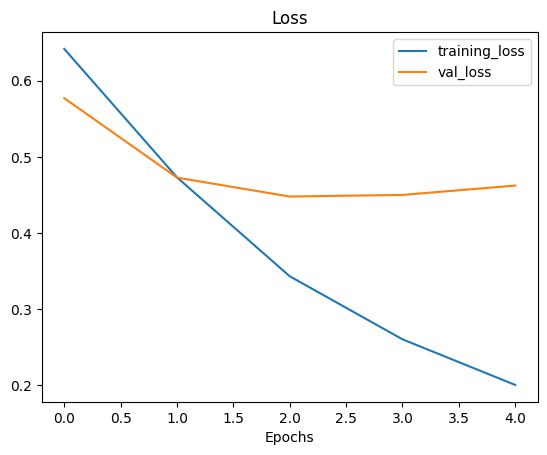

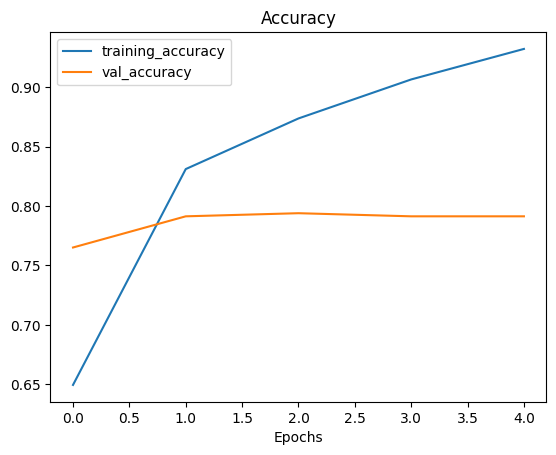

In [32]:
# Plot the curve
plot_loss_curves(history_model_1)

In [33]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.4624 - accuracy: 0.7913


[0.46235352754592896, 0.7913385629653931]

### Model_2: LSTM model(RNN)
LSTM = Long Short Term Memory(one of the most popular cells)

Structure of an RNN typically looks like this:
> `Input(text) -> Tokenize -> Embedding -> Layers(RNNs/dense) -> Output (label probability)`

In [34]:
model_2 = tf.keras.Sequential([
    # layers.Input(shape=(1,)),
    text_vectorizer,
    embedding,
    layers.LSTM(64),
    layers.Dense(1, activation="sigmoid")
],name="model_2_lstm")

model_2.compile(loss="binary_crossentropy",
                metrics=["accuracy"],
                optimizer="adam")

In [35]:
# Get the model summary
model_2.summary()

Model: "model_2_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
history_model_2 = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Sequential_model_2_lstm")])

Saving TensorBoard log files to: model_logs/Sequential_model_2_lstm/20230916-101908
Epoch 1/5
215/215 [==============================] - 15s 52ms/step - loss: 0.3792 - accuracy: 0.8248 - val_loss: 0.4767 - val_accuracy: 0.7927
Epoch 2/5
215/215 [==============================] - 4s 16ms/step - loss: 0.2429 - accuracy: 0.9032 - val_loss: 0.4868 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1752 - accuracy: 0.9329 - val_loss: 0.6417 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1301 - accuracy: 0.9521 - val_loss: 0.7984 - val_accuracy: 0.7598
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.1008 - accuracy: 0.9604 - val_loss: 0.8726 - val_accuracy: 0.7743


In [37]:
# predicted val sentences
model_2_pred_prob = model_2.predict(val_sentences)
model_2_preds = tf.squeeze(tf.round(model_2_pred_prob))

# Calulate metrics for evaluation
results_model_2 = calculate_results(y_true=val_labels, y_pred=model_2_preds)
results_model_2

24/24 [==============================] - 0s 3ms/step


{'accuracy': 77.42782152230971,
 'precision': 0.7762579677540307,
 'recall': 0.7742782152230971,
 'f1': 0.7721023076072874}

### Model_5: 1D Convolutional Neural Network(CNN)
We've used CNNs for images but images are typically 2D(height x width)... however, our text data is 1D.

Previously we've Conv2D for our image data but now we're going to use Conv1D

The typical structure of a Conv1D model for sequences(in our case, text):` Inputs(text) -> Tokenization -> Embedding -> layer(s) (typically Conv1D + pooling) -> Outputs (class probability)`

In [38]:
# Build an 1d convolutional neural network
from tensorflow.keras import layers

model_5 = tf.keras.Sequential([
    text_vectorizer,
    embedding,
    layers.Conv1D(filters=64, kernel_size=5, strides=1, activation="relu", padding ="valid"),
    layers.GlobalMaxPooling1D(),
    layers.Dense(1, activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                metrics=["accuracy"],
                optimizer="adam")

model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1321089 (5.04 MB)
Trainable params: 1321

In [39]:
# Fit the model
history_model_5 = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Sequential_model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/Sequential_model_5_Conv1D/20230916-101935
Epoch 1/5
215/215 [==============================] - 17s 55ms/step - loss: 0.2068 - accuracy: 0.9349 - val_loss: 0.6529 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.1096 - accuracy: 0.9610 - val_loss: 0.7678 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 2s 12ms/step - loss: 0.0813 - accuracy: 0.9714 - val_loss: 0.8704 - val_accuracy: 0.7520
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0688 - accuracy: 0.9761 - val_loss: 0.9014 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.0614 - accuracy: 0.9778 - val_loss: 0.9360 - val_accuracy: 0.7533


In [40]:
# predicted val sentences
model_5_pred_prob = model_5.predict(val_sentences)
model_5_preds = tf.squeeze(tf.round(model_5_pred_prob))

# Calulate metrics for evaluation
results_model_5 = calculate_results(y_true=val_labels, y_pred=model_5_preds)
results_model_5

24/24 [==============================] - 0s 3ms/step


{'accuracy': 75.32808398950131,
 'precision': 0.7530825365422846,
 'recall': 0.7532808398950132,
 'f1': 0.753160853642739}

## Retrain the baseline model with 10% of the training data.

> How does it perform compared to the Universal Sentence Encoder model with 10% of the training data?

### Splitting 10% data

In [41]:
# Making a better dataset split(no data leakage)
train_10_percent_split = int(0.1 *  len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [42]:
import numpy as np
# Check the number of train labels in updated dataset
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

### Model_0: Naive Bayes(baseline)

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll use Sklearn's Multinomial Naive Bayes using the TF-IDF(Term frequency - inverse document frequency, i.e. tf-idf = tf * idf) formula to convert our words to numbers.


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [44]:
# Create a tokenization and modelling pipeline
model_0 = Pipeline([
          ("tfidf", TfidfVectorizer()), # Convert words to numbers using tfidf
          ("clf", MultinomialNB()) #model the text
])


### Fitting baseline model on 10% training data

In [45]:
model_0.fit(train_sentences_10_percent, train_labels_10_percent)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [46]:
# Evaluate baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 70.21%


In [47]:
# Evaluate through other metrics
# predicted val sentences
baseline_model_pred_prob = model_0.predict(val_sentences)
baseline_model_preds = tf.squeeze(tf.round(baseline_model_pred_prob))

# Calulate metrics for evaluation
results_baseline_model = calculate_results(y_true=val_labels, y_pred=baseline_model_preds)
results_baseline_model

{'accuracy': 70.20997375328083,
 'precision': 0.7599524002753854,
 'recall': 0.7020997375328084,
 'f1': 0.6736831571468213}

## Fine-tuning the TF Hub Universal Sentence Encoder model
 By setting training=True when instantiating it as a Keras layer.
```
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True) # turn training on to fine-tune the TensorFlow Hub model
```

### Feature extractor model

In [48]:
import tensorflow_hub as hub
# Create a Keras layer using the USE pretrained layer from tensorflowhub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable= False,
                                        name="USE")


In [49]:
# Create model using Sequenitial API
feature_extractor_model = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="feature_extractor_model_USE")

In [50]:
feature_extractor_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [51]:
# Train a classifier on top of USE pretrained embeddings
history_feature_extractor = feature_extractor_model.fit(train_sentences,
                              train_labels,
                              epochs=4,
                              validation_data=(val_sentences,val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20230916-102056
Epoch 1/4
215/215 [==============================] - 9s 19ms/step - loss: 0.4711 - accuracy: 0.7859 - val_loss: 0.4329 - val_accuracy: 0.8123
Epoch 2/4
215/215 [==============================] - 3s 13ms/step - loss: 0.3959 - accuracy: 0.8301 - val_loss: 0.4197 - val_accuracy: 0.8228
Epoch 3/4
215/215 [==============================] - 3s 14ms/step - loss: 0.3673 - accuracy: 0.8425 - val_loss: 0.4208 - val_accuracy: 0.8110
Epoch 4/4
215/215 [==============================] - 3s 16ms/step - loss: 0.3367 - accuracy: 0.8603 - val_loss: 0.4270 - val_accuracy: 0.8163


In [52]:
# predicted val sentences
feature_extractor_model_pred_prob = feature_extractor_model.predict(val_sentences)
feature_extractor_model_preds = tf.squeeze(tf.round(feature_extractor_model_pred_prob))

# Calulate metrics for evaluation
results_feature_extractor_model = calculate_results(y_true=val_labels, y_pred=feature_extractor_model_preds)
results_feature_extractor_model

24/24 [==============================] - 1s 10ms/step


{'accuracy': 81.62729658792651,
 'precision': 0.8194307529740601,
 'recall': 0.8162729658792651,
 'f1': 0.8145018782850012}

### Fine-tuning

In [53]:
# Create a Keras layer using the USE pretrained layer from tensorflowhub for fine tuning
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable= True,
                                        name="USE")

In [54]:

feature_extractor_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [55]:
# Get the last epoch of the feature_extractor_model
initial_epoch = history_feature_extractor.epoch[-1]

# Calculate the total number of epochs for fine-tuning
fine_tune_epochs = initial_epoch + 3

# Train a classifier on top of USE pretrained embeddings (fine-tuning)
history_fine_tuning = feature_extractor_model.fit(
    train_sentences,
    train_labels,
    initial_epoch=initial_epoch,
    epochs=fine_tune_epochs,
    validation_data=(val_sentences, val_labels),
    callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encoder_fine_tuning")]
)

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_fine_tuning/20230916-102120
Epoch 4/6
215/215 [==============================] - 6s 17ms/step - loss: 0.2813 - accuracy: 0.8895 - val_loss: 0.4329 - val_accuracy: 0.8176
Epoch 5/6
215/215 [==============================] - 3s 14ms/step - loss: 0.2711 - accuracy: 0.8948 - val_loss: 0.4330 - val_accuracy: 0.8241
Epoch 6/6
215/215 [==============================] - 3s 14ms/step - loss: 0.2636 - accuracy: 0.8991 - val_loss: 0.4368 - val_accuracy: 0.8255


### Evaluating fine tuned model

In [56]:
# predicted val sentences
fine_tuned_model_pred_prob =feature_extractor_model.predict(val_sentences)
fine_tuned_model_preds = tf.squeeze(tf.round(fine_tuned_model_pred_prob))

# Calulate metrics for evaluation
results_fine_tuned_model = calculate_results(y_true=val_labels, y_pred=fine_tuned_model_preds)
results_fine_tuned_model

24/24 [==============================] - 1s 9ms/step


{'accuracy': 82.54593175853019,
 'precision': 0.8286895266074388,
 'recall': 0.8254593175853019,
 'f1': 0.8238269415090449}

In [57]:
results_feature_extractor_model

{'accuracy': 81.62729658792651,
 'precision': 0.8194307529740601,
 'recall': 0.8162729658792651,
 'f1': 0.8145018782850012}

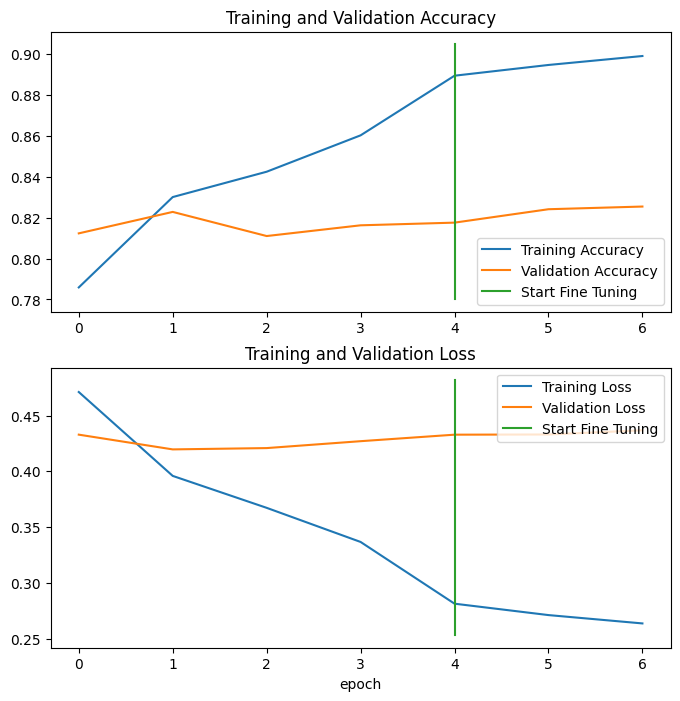

In [58]:
compare_historys(original_history=history_feature_extractor,new_history=history_fine_tuning)

## Compare all models

In [59]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline_model": results_baseline_model,
                                 "simple_dense_model": results_model_1,
                                 "lstm_model": results_model_2,
                                 "conv1D_model": results_model_5,
                                 "tf_hub_use_encoder_feature_extractor": results_feature_extractor_model,
                                 "tf_hub_use_encoder_fine_tuned": results_fine_tuned_model})

In [60]:
all_results = all_model_results.transpose()
all_results

,accuracy,precision,recall,f1
baseline_model,70.209974,0.759952,0.702100,0.673683
simple_dense_model,79.133858,0.797117,0.791339,0.788185
lstm_model,77.427822,0.776258,0.774278,0.772102
conv1D_model,75.328084,0.753083,0.753281,0.753161
tf_hub_use_encoder_feature_extractor,81.627297,0.819431,0.816273,0.814502
tf_hub_use_encoder_fine_tuned,82.545932,0.828690,0.825459,0.823827


In [61]:
# Reduce the accuracy to the same scale as other metrics
all_results["accuracy"] = all_results["accuracy"]/100

### Visualize all model performance

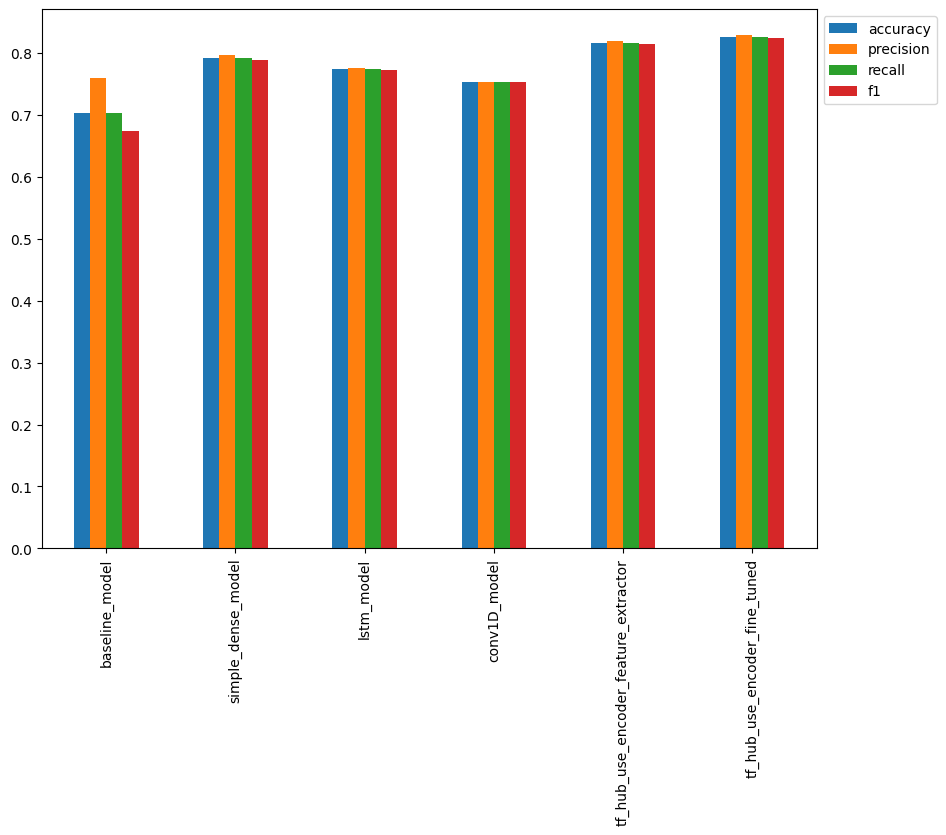

In [62]:
# Plot and compare all of the model results
all_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

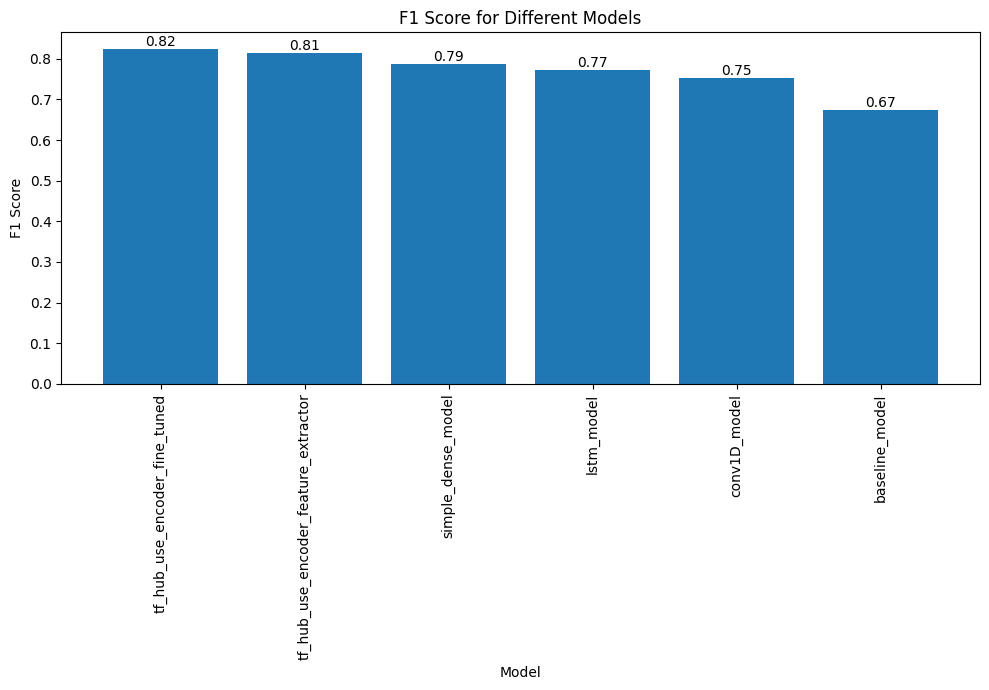

In [63]:
import pandas as pd
import matplotlib.pyplot as plt


# Sort the DataFrame by "f1" column in descending order
all_results_sorted = all_results.sort_values("f1", ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 7))
bars = plt.bar(all_results_sorted.index, all_results_sorted["f1"])

# Annotate each bar with its f1 value
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Models')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

## Retrain the best model you've got so far on the whole training set (no validation split).
 Then using  trained model to make predictions on the test dataset and format the predictions into the same format as the `sample_submission.csv` file from Kaggle (see the Files tab in Colab for what the `sample_submission.csv` file looks like). Once done this, [make a submission to the Kaggle competition](https://www.kaggle.com/c/nlp-getting-started/data)

### Feature-extraction on full data

In [64]:
import tensorflow_hub as hub
# Create a Keras layer using the USE pretrained layer from tensorflowhub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable= False,
                                        name="USE")

# Create model using Sequenitial API
feature_extractor_model = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="feature_extractor_model_USE")

feature_extractor_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [65]:
# Getting full train data
full_train_sentences = train_data_shuffled["text"].to_numpy()
full_train_labels = train_data_shuffled["target"].to_numpy()

In [66]:
# Train a classifier on top of USE pretrained embeddings
history_train_full_feature_extractor = feature_extractor_model.fit(full_train_sentences,
                              full_train_labels,
                              epochs=4)

Epoch 1/4
238/238 [==============================] - 6s 12ms/step - loss: 0.4640 - accuracy: 0.7989
Epoch 2/4
238/238 [==============================] - 3s 15ms/step - loss: 0.3946 - accuracy: 0.8287
Epoch 3/4
238/238 [==============================] - 3s 12ms/step - loss: 0.3661 - accuracy: 0.8438
Epoch 4/4
238/238 [==============================] - 3s 12ms/step - loss: 0.3339 - accuracy: 0.8608


### Fine tuning on full data

In [67]:
# Create a Keras layer using the USE pretrained layer from tensorflowhub for fine tuning
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable= True,
                                        name="USE")

In [68]:
feature_extractor_model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [69]:
# Get the last epoch of the feature_extractor_model
initial_epoch = history_feature_extractor.epoch[-1]

# Calculate the total number of epochs for fine-tuning
fine_tune_epochs = initial_epoch + 3

# Train a classifier on top of USE pretrained embeddings (fine-tuning)
history_fine_tuning = feature_extractor_model.fit(
    train_sentences,
    train_labels,
    initial_epoch=initial_epoch,
    epochs=fine_tune_epochs,
    validation_data=(val_sentences, val_labels),
    callbacks=[create_tensorboard_callback(SAVE_DIR, "tf_hub_sentence_encoder_fine_tuning")]
)

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_fine_tuning/20230916-102208
Epoch 4/6
215/215 [==============================] - 6s 19ms/step - loss: 0.2771 - accuracy: 0.8920 - val_loss: 0.2868 - val_accuracy: 0.8898
Epoch 5/6
215/215 [==============================] - 3s 14ms/step - loss: 0.2665 - accuracy: 0.8971 - val_loss: 0.2846 - val_accuracy: 0.8924
Epoch 6/6
215/215 [==============================] - 3s 14ms/step - loss: 0.2584 - accuracy: 0.9018 - val_loss: 0.2911 - val_accuracy: 0.8806


### Making prediction on test sentences

In [70]:
test_sentences = test_data["text"].to_numpy()

In [71]:
test_pred_prob = feature_extractor_model.predict(test_sentences)
test_pred_prob[:10]

102/102 [==============================] - 1s 10ms/step


array([[0.61048406],
       [0.9785629 ],
       [0.8245262 ],
       [0.9348804 ],
       [0.98699224],
       [0.48210147],
       [0.0287525 ],
       [0.0111586 ],
       [0.03132624],
       [0.02544258]], dtype=float32)

In [72]:
# Converting to labels 0 or 1
test_preds= tf.squeeze(tf.round(test_pred_prob))
test_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.], dtype=float32)>

In [73]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [74]:
ids = test_data["id"]
ids

0           0
1           2
2           3
3           9
4          11
        ...  
3258    10861
3259    10865
3260    10868
3261    10874
3262    10875
Name: id, Length: 3263, dtype: int64

In [75]:
submission_data = pd.DataFrame({"id":ids,
                                "target": test_preds})
submission_data

,id,target
0,0,1.0
1,2,1.0
2,3,1.0
3,9,1.0
4,11,1.0
...,...,...
3258,10861,1.0
3259,10865,1.0
3260,10868,1.0
3261,10874,1.0


In [76]:
# Convert the "target" column from float to integer
submission_data["target"] = submission_data["target"].astype(int)


### Saving csv

In [77]:
# Save the DataFrame to a CSV file
submission_data.to_csv('submission.csv', index=False)

## Make a confusion matrix with the best performing model's predictions
 Use validation set and the validation ground truth labels.

In [78]:
# Predictions from best model
# predicted val sentences
fine_tuned_model_pred_prob =feature_extractor_model.predict(val_sentences)
fine_tuned_model_preds = tf.squeeze(tf.round(fine_tuned_model_pred_prob))

24/24 [==============================] - 0s 15ms/step


In [79]:
class_names = ["disaster", "not_disaster"]

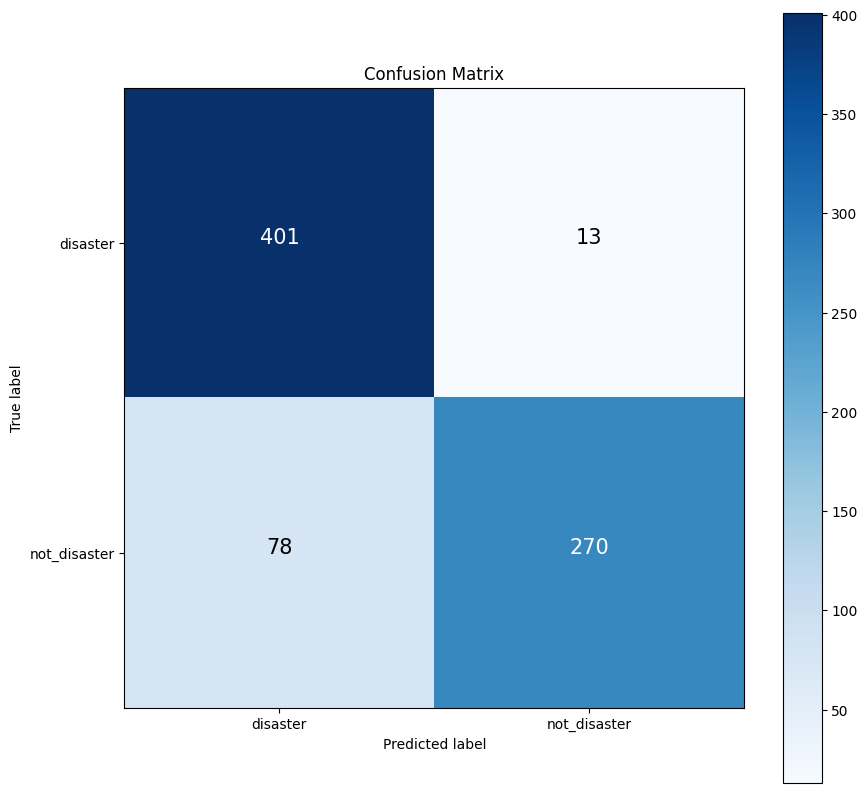

In [80]:
from helper_functions import make_confusion_matrix
make_confusion_matrix(y_true=val_labels, y_pred=fine_tuned_model_preds, classes=class_names)